# <center>Covid 19 fake news prediction on Social media data using Naive Bayes Classification</center>

In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Dataset Loading And Exploring

In [ ]:
#load datset
df = pd.read_csv('Constraint_Train.csv')

In [ ]:
df.head(10)

In [ ]:
#check for missing values
df.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().value_counts()

False    6424
dtype: int64

In [ ]:
df['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6424 non-null   int64 
 1   tweet   6424 non-null   object
 2   label   6424 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.7+ KB


In [ ]:
df.shape

(6424, 3)

In [ ]:
df.label.value_counts()

real    3364
fake    3060
Name: label, dtype: int64

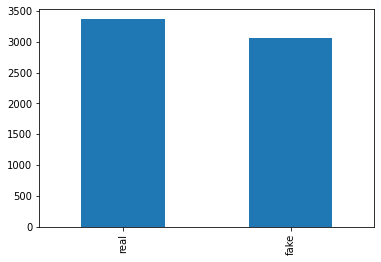

In [ ]:
plt.figure()
df.label.value_counts().plot.bar()
plt.show()

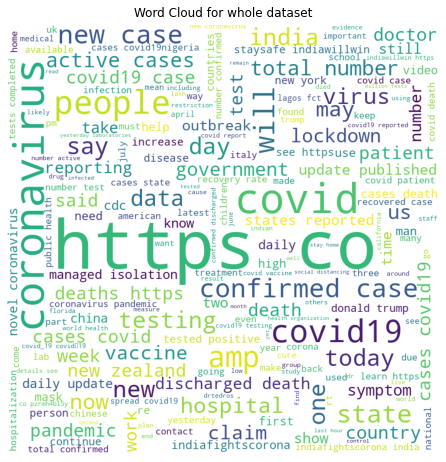

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.tweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for whole dataset")
plt.show()

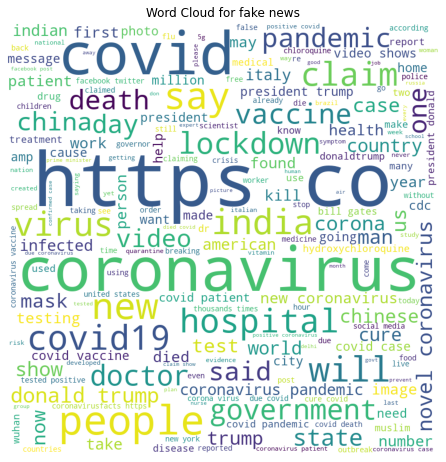

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df['tweet'][df['label'] == 'fake']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for fake news")
plt.show()

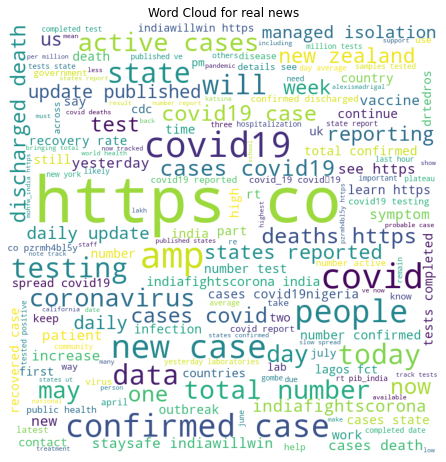

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df['tweet'][df['label'] == 'real']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for real news")
plt.show()

## Data Cleaning and Pre-Processing


In [ ]:
#droping id column
df = df.drop(['id'],axis=1)

In [ ]:
#nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(tweet):
    """
        A Function to clean and preprocess text
    """
     #removing html tags:
    tweet = re.sub('<.*?>',' ',tweet)
    #removing special characters (punctuation) '@,!' e.t.c.
    tweet = re.sub('\W',' ',tweet)
    #removing single characters
    tweet = re.sub('\s+[a-zA-Z]\s+',' ', tweet)
    #substituting multiple spaces with single space
    tweet = re.sub('\s+',' ', tweet)
   
    #removing stop words
    #word_tokens = []
    word_tokens = word_tokenize(tweet)
    #filtered_sentence.append([w for w in word_tokens if w not in stop_words])
    filtered_sentence = " ".join([w for w in word_tokens if w not in stop_words])
    return filtered_sentence

In [ ]:
processed_tweet = list(df['tweet'].apply(preprocess_text).values)

In [ ]:
processed_tweet[0]

'The CDC currently reports 99031 deaths In general discrepancies death counts different sources small explicable The death toll stands roughly 100000 people today'

## Word to Feature Vector TF-IDF 

Since we have reviews as text and we want to run a mathematical model we need a method to convert the text to numbers. We will use TF-IDF method for this.

We will use pre-built TF-IDF vectorizer from sklearn library. Let us create a document term matrix (DTM) using TF-IDF. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,3))

In [ ]:
word_count_matrix = tfidf.fit_transform(processed_tweet)

# Training Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(word_count_matrix, df.label, test_size=0.20, random_state=33)

In [ ]:
y_train = (y_train.replace({'real': 1, 'fake': 0})).values
y_test = (y_test.replace({'real': 1, 'fake': 0})).values

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics

In [ ]:
#Fitting Naive Bayes model
naive_bayes_classifier = MultinomialNB ()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Model Evaluation

In [ ]:
accuracy_score = metrics.accuracy_score(naive_bayes_classifier.predict(X_test), y_test)
print(str('Accuracy : {:04.2f}'.format(accuracy_score*100))+" %")

Accuracy : 92.22 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: \n", classification_report(y_test, naive_bayes_classifier.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, naive_bayes_classifier.predict(X_test)))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.92      0.92       651
    Positive       0.92      0.92      0.92       634

    accuracy                           0.92      1285
   macro avg       0.92      0.92      0.92      1285
weighted avg       0.92      0.92      0.92      1285

Confusion Matrix: 
 [[602  49]
 [ 51 583]]


# Cross Validation 

In [ ]:
 from sklearn.model_selection import cross_val_score

In [ ]:
X = word_count_matrix
y = df.label.replace({"real":1,"fake":0})

In [ ]:
cv_score = cross_val_score(naive_bayes_classifier,X,y,cv=5)

In [ ]:
cv_score

array([0.93151751, 0.92762646, 0.9307393 , 0.93618677, 0.92056075])

In [ ]:
print("Mean Cross Validation score {}".format(np.mean(cv_score)))

Mean Cross Validation score 0.9293261573148115


# Test the Model

In [ ]:
def analyze_tweet(tweet):
    """A function to predict sentiment using naive bayes classifier
    """
    tweet = preprocess_text(tweet)
    word_to_vector = tfidf.transform([tweet])
    news_type = naive_bayes_classifier.predict(word_to_vector)[0]
    if news_type == 0:
        print("News type : Fake news")
    else:
        print("News type : Real news")

In [ ]:
while True:
    print("Enter q to stop")
    tweet = input("Tweet: ")
    if tweet == 'q':
        break
    analyze_tweet(tweet)
    print("\n")

Enter q to stop
Tweet: wear mask
News type : Real news


Enter q to stop
Tweet: q
